# Chris Hinckley
# DBMS Project 6
# Problem 1

In [ ]:
# Import the libraries.
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Read in the adult training dataset.
adultDF= pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

# Show the first 5 data rows.
adultDF.head()

,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K


In [ ]:
# Encode our 5 categorical variables: workclass, marital-status, occupation, sex, and income.
# This way our model will be able to analyze them with the other 4 numerical variables.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Save the encoded dataframe here.
encoded_adultDF = pd.DataFrame()

# Encode  only the categoric or boolean attributes.

# This "for" loop will loop through the 9 different columns in our data.
for i in range(0, adultDF.shape[1]):
    # On each loop, if the column is one of our 5 categorical variables, we encode the data into categorical numbers.
    if adultDF.dtypes[i]=='object':
        # For example, line below does:
            # encoded_adultDF["workclass"] = le.fit_transform(data)
        encoded_adultDF[adultDF.columns[i]] = le.fit_transform(adultDF[adultDF.columns[i]])
    else:
        encoded_adultDF[adultDF.columns[i]] = adultDF[adultDF.columns[i]]

# Output new data frame.
# NOTE: Can ignore the warning below.  In the future, may need to change the above code to...
# ... dataframe['variable'] = label_encoder.fit_transform(your_dataframe.loc[:, 'variable'])
encoded_adultDF.head(10)


,age,workclass,education,marital-status,occupation,sex,capital-gain,capital-loss,income
0,50,6,13,2,4,1,0,0,0
1,38,4,9,0,6,1,0,0,0
2,49,4,5,3,8,0,0,0,0
3,52,6,9,2,4,1,0,0,1
4,31,4,14,4,10,0,14084,0,1
5,40,4,11,2,3,1,0,0,1
6,38,4,7,2,12,1,0,0,0
7,43,4,7,2,14,1,0,2042,0
8,54,0,10,2,0,1,0,0,1
9,39,4,9,0,4,1,0,0,0


In [ ]:
# Now, split the data into the 8 X Variables, and the 1 Y Variable.
# Store it in "X" and "y", which is used next.
X = encoded_adultDF.filter(['age','workclass','education','marital-status','occupation','sex','capital-gain','capital-loss'], axis=1)
y = encoded_adultDF['income']
print("X variables")
print(X)
print("Y variable")
print(y)

X variables
       age  workclass  education  marital-status  occupation  sex  \
0       50          6         13               2           4    1   
1       38          4          9               0           6    1   
2       49          4          5               3           8    0   
3       52          6          9               2           4    1   
4       31          4         14               4          10    0   
...    ...        ...        ...             ...         ...  ...   
14792   43          6         10               2           3    1   
14793   32          4          6               2           6    1   
14794   32          4         14               4          13    1   
14795   58          4          9               6           1    0   
14796   22          4          9               4           1    1   

       capital-gain  capital-loss  
0                 0             0  
1                 0             0  
2                 0             0  
3              

In [ ]:
# Split the data into training and testing data.
# 80% of the data is training data, and 20% will be testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, train_size=0.80, stratify=y)

# This is dimensions of the data.
# The training data has 11837 rows, for the 8 variables.
# The testing data has 2960 rows, for the 8 variables.
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (11837, 8)
Test size: (2960, 8)


In [ ]:
#
#
#
#
#
#
# PART 1 == 4 Functions
#
#
#
#
#
#

In [ ]:
# Now, can create the requested: classifier = makeDTModel(classifier_type, X_train, y_train)
def makeDTModel(classifier_type, X_train_param, y_train_param, max_depth_n, max_leaf_nodes_n):
    # If classifier is type "gini", cart_classifier, then do that statement.
    # The numbers that were passed in to here from the function call (max_depth_n, max_leaf_nodes_n)...
    # ... will be used when creating the model below.
    if classifier_type == "gini":
        classifier = DecisionTreeClassifier(criterion = classifier_type,
                                                 max_depth = max_depth_n,
                                                 max_leaf_nodes=max_leaf_nodes_n,
                                                 random_state = 120
                                                ).fit(X_train_param, y_train_param)

    # If classifier is type "entropy", c5_classifer, then do this statement.
    if classifier_type == "entropy":
        classifier = DecisionTreeClassifier(criterion = classifier_type,
                                                 max_depth = max_depth_n,
                                                 max_leaf_nodes=max_leaf_nodes_n,
                                                 random_state = 120
                                                ).fit(X_train_param, y_train_param)


    # Return the classifier to the function call.
    return classifier


In [ ]:
# Using the classifier from the makeDTModel function, and the X data (the 8 X variables)...
# ... create the plot
def displayTree(classifier_param, X_param):

    # Initialize an empty figure.
    figure(figsize=(10, 8), dpi=80)

    cn = ['low_income', 'high_income']
    # feature_names = names of 8 variables. class_names = name of 1 variable to predict (outcome either low_income or high_income)
    # plots the tree in a graphical representation
    tree.plot_tree(classifier_param, feature_names=X_param.columns.values.tolist(),
                                    class_names=cn,
                                    filled = True)
    # plots the tree as text.
    text_representation = tree.export_text(classifier_param,
                                           feature_names=X.columns.values.tolist())
    print(text_representation)



In [ ]:
def displayCM(classifier_param, X_train_param, y_train_param, X_test_param, y_test_param):

    # Based on the classifier_param (which shows the data correlations, predict the outputs of the X_test data.)
    predictions = classifier_param.predict(X_test)

    # Compute TP, TN, FP, FN accuracy values for the confusion matrix.
    confusion_matrix_result = confusion_matrix(y_true=y_test_param,
                               y_pred = predictions)

    print(confusion_matrix_result)

    # Plot the heatmap of the confusion matrix.
    plt.figure(figsize=(8,8))
    sns.heatmap(confusion_matrix_result, annot=True,
                linewidths=.5, square = True, cmap = 'Oranges_r', fmt='0.4g');

    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
def compareModels(cart_classifier, c5_classifier, X_train_param, y_train_param, X_test_param, y_test_param):

    # get classification accuracy on training and test datasets
    score1 = round(cart_classifier.score(X_train_param, y_train_param), 2) # training score
    score2 = round(cart_classifier.score(X_test_param, y_test_param), 2)   # testing score
    #print ("CART Training and Testing scores: %.2f, %.2f" %  (score1, score2))

    score3 = round(c5_classifier.score(X_train_param, y_train_param), 2) # training score
    score4 = round(c5_classifier.score(X_test_param, y_test_param), 2)   # testing score
    #print ("C5.0 Training and Testing scores: %.2f, %.2f" %  (score3, score4))

    labels = ['CART', 'C5.0']
    training_scores = [score1, score3]
    testing_scores =  [score2, score4]

    x = np.arange(2)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, training_scores, width, label='Training', color='navy')
    rects2 = ax.bar(x + width/2, testing_scores, width, label='Testing', color='orange')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Model Accuracy')
    ax.set_xticks(x)
    ax.set_ylim(0,1)
    ax.set_xticklabels(labels)
    ax.legend(bbox_to_anchor = (1.3, 1.0), loc='upper right')

    plt.title('Model Comparisons')
    plt.show()


In [ ]:
# Function Call Demonstration (See Below Cells)
cart_classifier = makeDTModel("gini", X_train, y_train, 2, 5)
c5_classifier = makeDTModel("entropy", X_train, y_train, 2, 5)

|--- capital-gain <= 5095.50
|   |--- marital-status <= 2.50
|   |   |--- class: 0
|   |--- marital-status >  2.50
|   |   |--- class: 0
|--- capital-gain >  5095.50
|   |--- capital-gain <= 7073.50
|   |   |--- class: 1
|   |--- capital-gain >  7073.50
|   |   |--- class: 1

|--- marital-status <= 2.50
|   |--- education <= 12.50
|   |   |--- class: 0
|   |--- education >  12.50
|   |   |--- class: 1
|--- marital-status >  2.50
|   |--- capital-gain <= 4718.50
|   |   |--- class: 0
|   |--- capital-gain >  4718.50
|   |   |--- class: 1



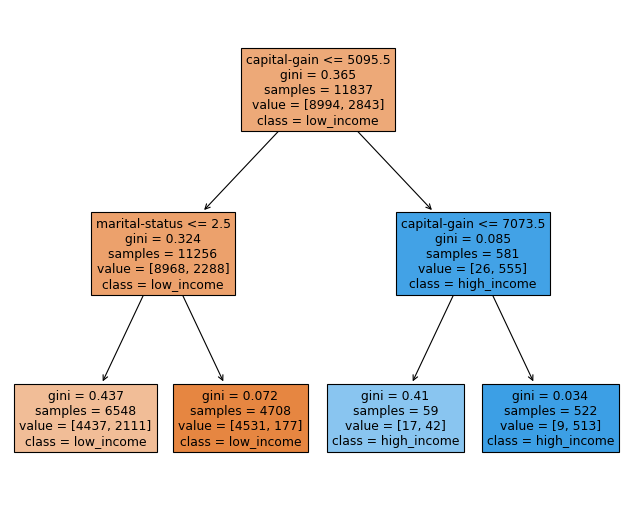

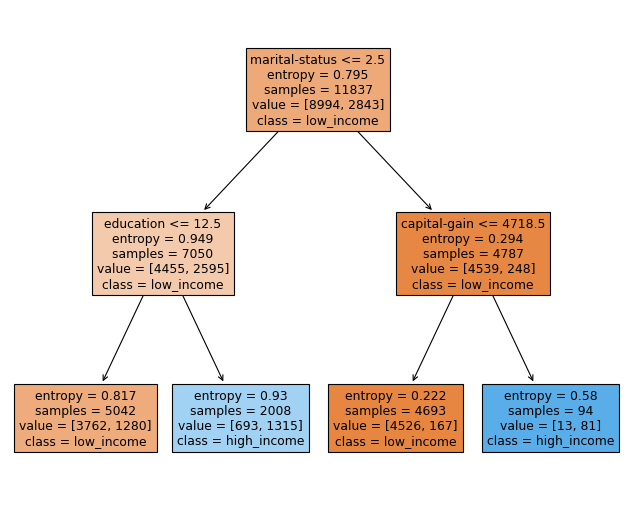

In [ ]:
# Call Functions to display text and graphic representation of a tree classifier
displayTree(cart_classifier, X)
displayTree(c5_classifier, X)

[[2238   11]
 [ 583  128]]
[[2084  165]
 [ 407  304]]


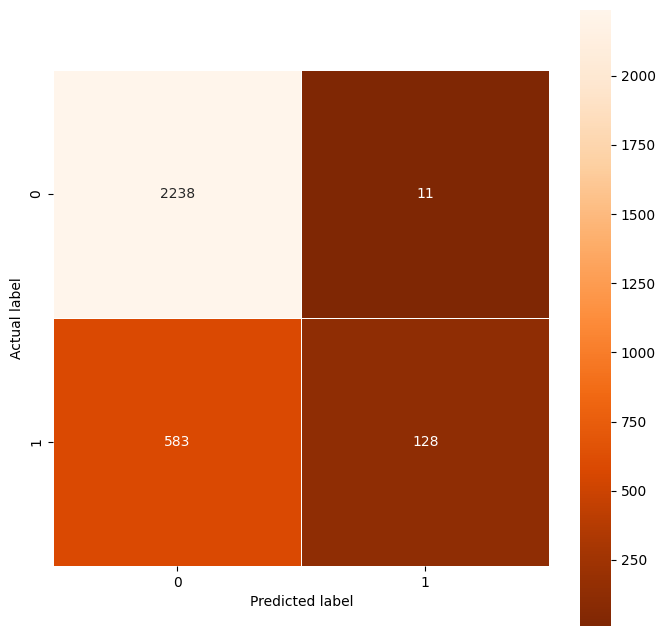

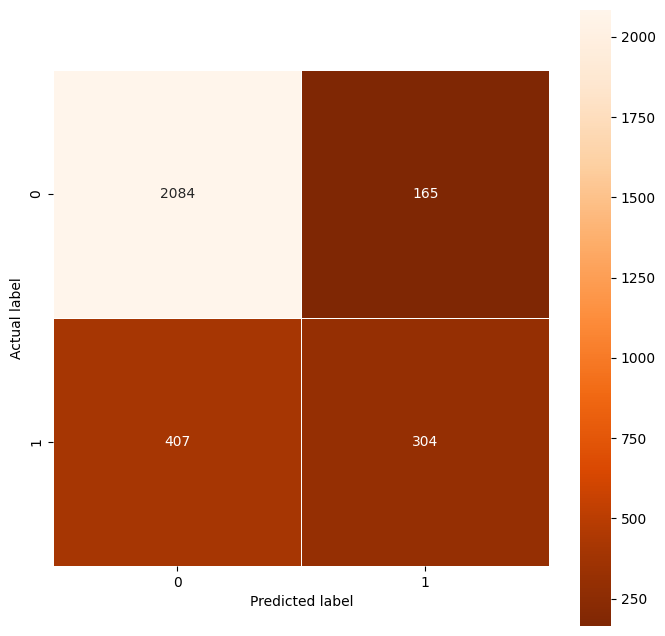

In [ ]:
# Call Functions to display text and heatmap of a confusion matrix
displayCM(cart_classifier, X_train, y_train, X_test, y_test)
displayCM(c5_classifier, X_train, y_train, X_test, y_test)

#
#
#
#
#
#
# PART 2 == Analysis, Plot Accuracy
#Analyze the effect of the parameters max_depth and max_leaf_nodes on classification accuracy. Plot the obtained accuracy values for various choices of max_depth (e.g. 2, 3, 4, none) and max_leaf_nodes (3, 4, 5, none).
#
#
#
#
#

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.81, 0.80
Graph Below compares model accuracy using max depth of 2 and max leaf nodes of 3


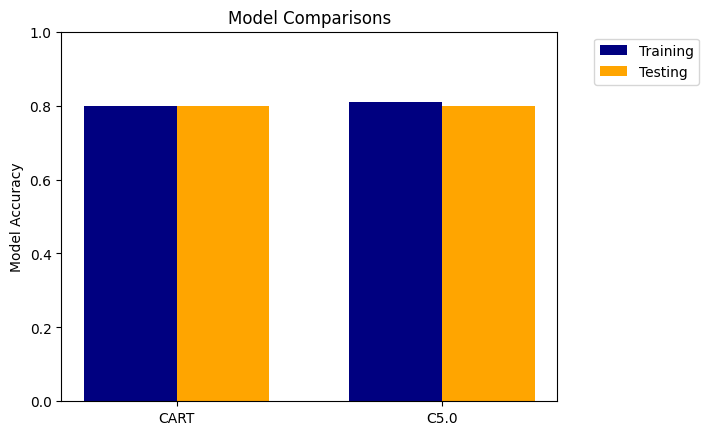

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.82, 0.81
Graph Below compares model accuracy using max depth of 2 and max leaf nodes of 4


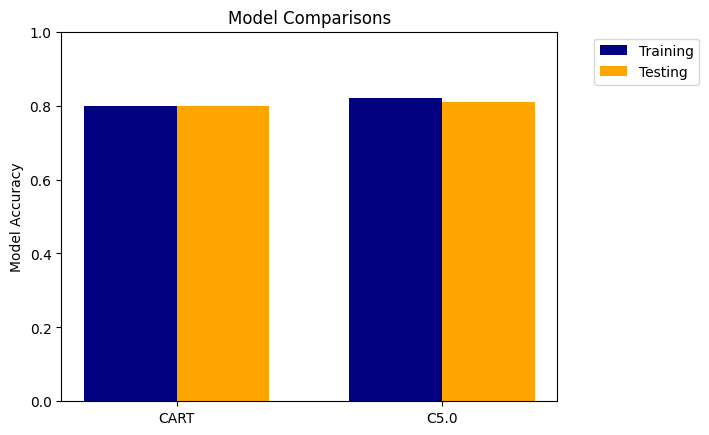

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.82, 0.81
Graph Below compares model accuracy using max depth of 2 and max leaf nodes of 5


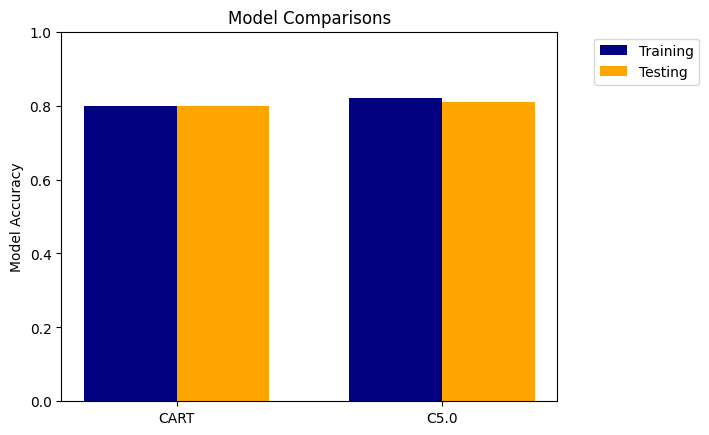

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.82, 0.81
Graph Below compares model accuracy using max depth of 2 and max leaf nodes of None


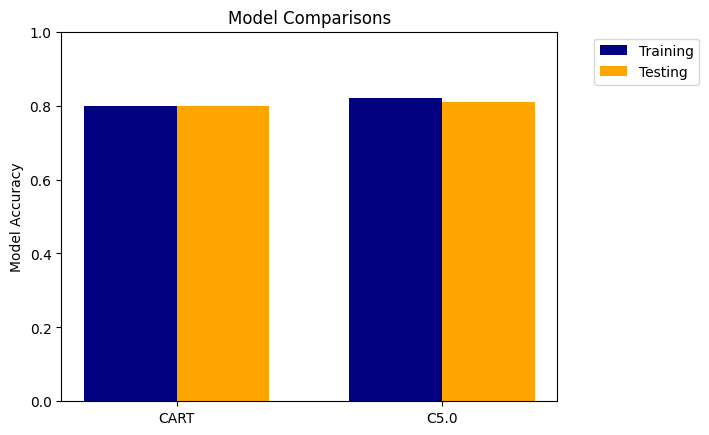

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.81, 0.80
Graph Below compares model accuracy using max depth of 3 and max leaf nodes of 3


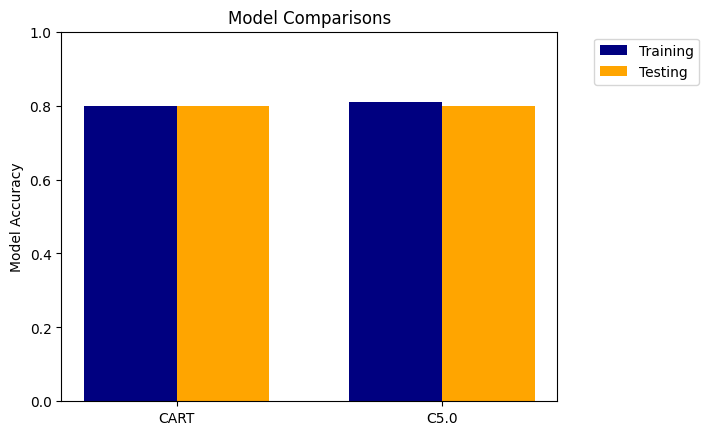

Cart Model Accuracy: 0.83, 0.82
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of 3 and max leaf nodes of 4


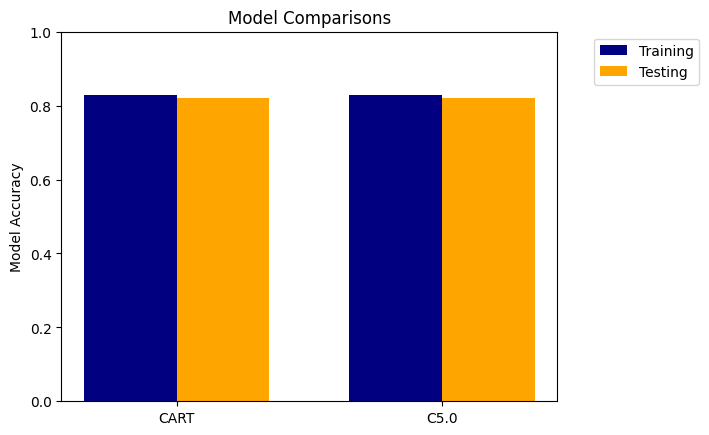

Cart Model Accuracy: 0.83, 0.82
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of 3 and max leaf nodes of 5


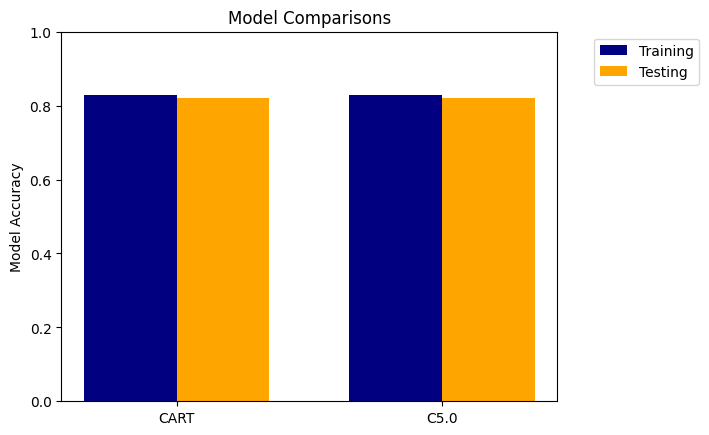

Cart Model Accuracy: 0.83, 0.83
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of 3 and max leaf nodes of None


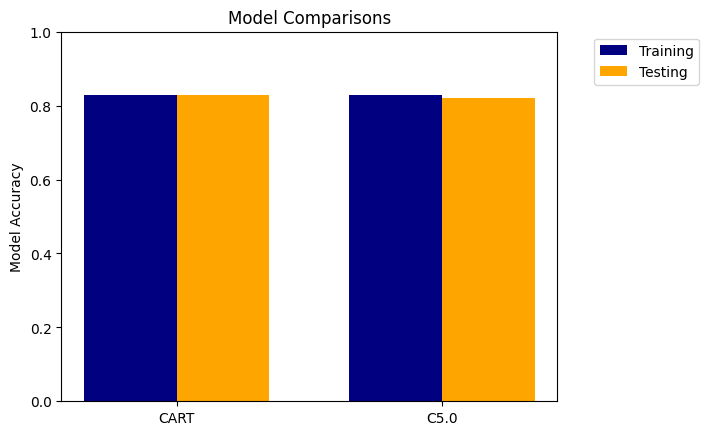

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.81, 0.80
Graph Below compares model accuracy using max depth of 4 and max leaf nodes of 3


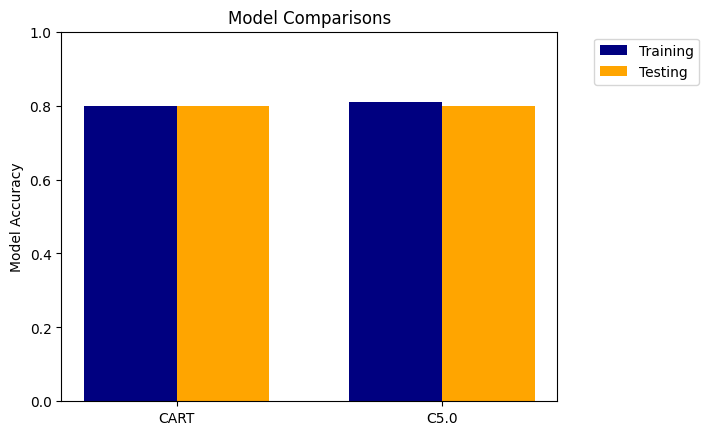

Cart Model Accuracy: 0.83, 0.82
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of 4 and max leaf nodes of 4


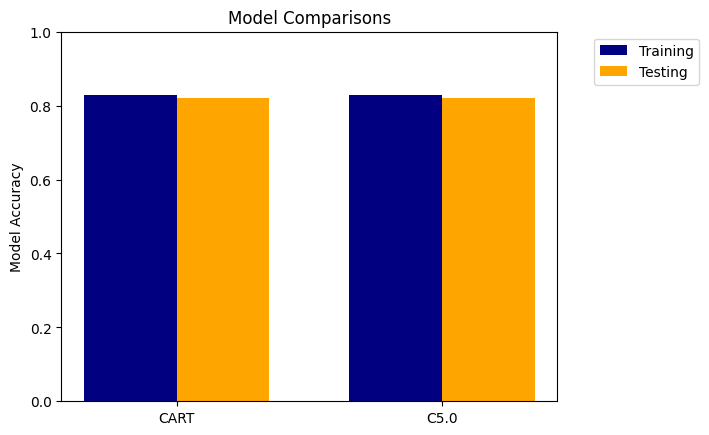

Cart Model Accuracy: 0.83, 0.82
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of 4 and max leaf nodes of 5


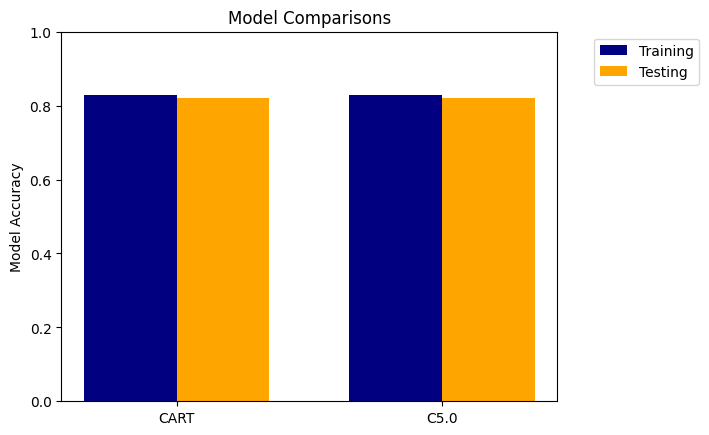

Cart Model Accuracy: 0.85, 0.84
C5 Model Accuracy: 0.85, 0.84
Graph Below compares model accuracy using max depth of 4 and max leaf nodes of None


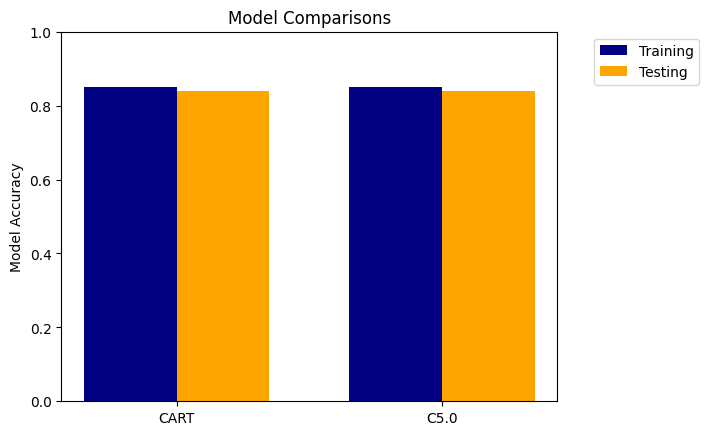

Cart Model Accuracy: 0.80, 0.80
C5 Model Accuracy: 0.81, 0.80
Graph Below compares model accuracy using max depth of None and max leaf nodes of 3


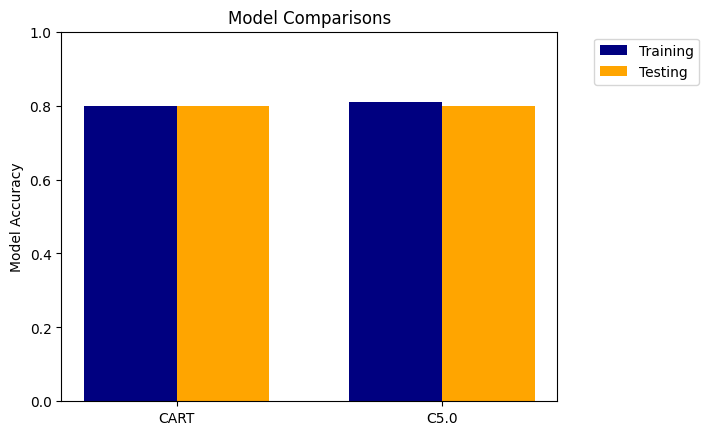

Cart Model Accuracy: 0.83, 0.82
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of None and max leaf nodes of 4


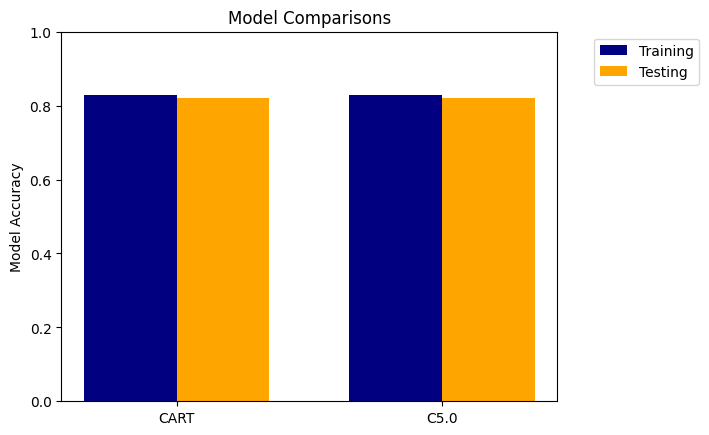

Cart Model Accuracy: 0.83, 0.82
C5 Model Accuracy: 0.83, 0.82
Graph Below compares model accuracy using max depth of None and max leaf nodes of 5


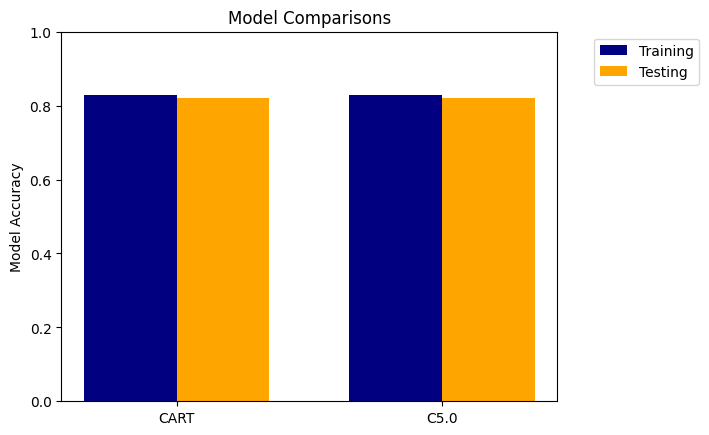

Cart Model Accuracy: 0.96, 0.82
C5 Model Accuracy: 0.96, 0.82
Graph Below compares model accuracy using max depth of None and max leaf nodes of None


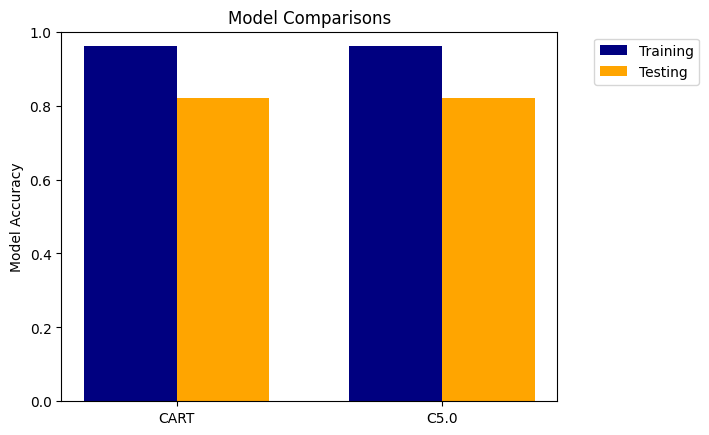

In [ ]:
# None means unlimited leafs
max_depths = [2,3,4,None]
max_leaf_nodes = [3,4,5,None]

test_data_accuracy = []
train_data_accuracy = []
depth_node_combo = []

# For every combination of max_depths, and max_leafs, get the accuracy of the model.
# For example, 2 max depth and 3 max leaf nodes.
#            ..2 max depth and 4 max leaf nodes.
#            ..etc.
for max_depth in max_depths:
    for max_leaf_node in max_leaf_nodes:

        # Using a max_depth and max__leaf_node combo, get cart classifier
        cart_classifier = makeDTModel("gini", X_train, y_train, max_depth, max_leaf_node)
        train_cart = round(cart_classifier.score(X_train, y_train), 2) # training score
        test_cart = round(cart_classifier.score(X_test, y_test), 2)   # testing score

        # Using the same max_depth and max__leaf_node combo, get c5 classifier
        c5_classifier = makeDTModel("entropy", X_train, y_train, max_depth, max_leaf_node)
        train_c5 = round(c5_classifier.score(X_train, y_train), 2) # training score
        test_c5 = round(c5_classifier.score(X_test, y_test), 2)   # testing score

        print ("Cart Model Accuracy: %.2f, %.2f" %  (train_cart, test_cart))
        print ("C5 Model Accuracy: %.2f, %.2f" %  (train_c5, test_c5))
        print("Graph Below compares model accuracy using max depth of", max_depth, "and max leaf nodes of", max_leaf_node)
        compareModels(cart_classifier, c5_classifier, X_train, y_train, X_test, y_test)

        test_data_accuracy.append(test_cart)
        train_data_accuracy.append(train_cart)
        depth_node_combo.append((max_depth, max_leaf_node))


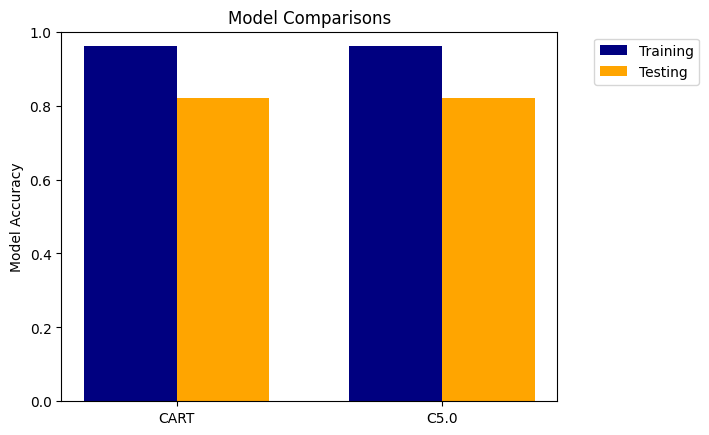

In [ ]:
# Call Functions to create and display plots of side-by-side model comparisons
compareModels(cart_classifier, c5_classifier, X_train, y_train, X_test, y_test)

In [ ]:
#
#
#
#
#
#
# PART 3 == Summary
#
#
#
#
#
#

In [ ]:
# Lets further summarize the graphs from our analysis above.
# One can see, the highest accuracy in our test data set, regarding our cart classifier,
# comes at 84%, when the depth_node is 4 and the leaf nodes are unlimited.  This makes sense,
# and could be due to the fact that a deeper tree increases the complexity of the model, which
# allows it to capture more of the correlations going on in the data.

for i, j in zip(test_data_accuracy, depth_node_combo):
    print(i,j)

0.8 (2, 3)
0.8 (2, 4)
0.8 (2, 5)
0.8 (2, None)
0.8 (3, 3)
0.82 (3, 4)
0.82 (3, 5)
0.83 (3, None)
0.8 (4, 3)
0.82 (4, 4)
0.82 (4, 5)
0.84 (4, None)
0.8 (None, 3)
0.82 (None, 4)
0.82 (None, 5)
0.82 (None, None)


In [ ]:
# The same happens in our training data. The deeper tree leads to better results.

for i, j in zip(train_data_accuracy, depth_node_combo):
    print(i,j)

0.8 (2, 3)
0.8 (2, 4)
0.8 (2, 5)
0.8 (2, None)
0.8 (3, 3)
0.83 (3, 4)
0.83 (3, 5)
0.83 (3, None)
0.8 (4, 3)
0.83 (4, 4)
0.83 (4, 5)
0.85 (4, None)
0.8 (None, 3)
0.83 (None, 4)
0.83 (None, 5)
0.96 (None, None)
